# Polynomial_regession
Here we will perform the data analysis on the weather, solar intensity, and power output of the photovoltic generators.

In [177]:
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from suntime import Sun

In [178]:
power = pd.read_csv('data/onemin-Roof-2016/cleaned-2016/roof-real-power-2016.csv')
power['TIMESTAMP'] = pd.to_datetime(power['TIMESTAMP'])

In [179]:
power

,TIMESTAMP,PwrMtrP_kW_Avg
0,2016-01-01 00:00:00-05:00,-0.077
1,2016-01-01 00:01:00-05:00,-0.078
2,2016-01-01 00:02:00-05:00,-0.078
3,2016-01-01 00:03:00-05:00,-0.078
4,2016-01-01 00:04:00-05:00,-0.078
...,...,...
521265,2016-12-31 23:55:00-05:00,-0.076
521266,2016-12-31 23:56:00-05:00,-0.076
521267,2016-12-31 23:57:00-05:00,-0.076
521268,2016-12-31 23:58:00-05:00,-0.076


In [180]:
power_day

,Date,Pwr Day Avg (kW)
0,2016-01-01,2.981141
1,2016-01-02,9.315451
2,2016-01-03,9.342386
3,2016-01-04,8.493872
4,2016-01-05,10.073160
...,...,...
359,2016-12-27,4.832714
360,2016-12-28,7.961941
361,2016-12-29,2.338316
362,2016-12-30,6.175579


In [181]:
power['Date'] = power['TIMESTAMP'].dt.date
power['Time'] = power['TIMESTAMP'].dt.time

In [182]:
power_day = power.groupby('Date').sum('PwrMtrP_kW_Avg').div(1440).reset_index()
power_day.rename(columns={'PwrMtrP_kW_Avg': 'Pwr Day Avg (kW)'}, inplace=True)

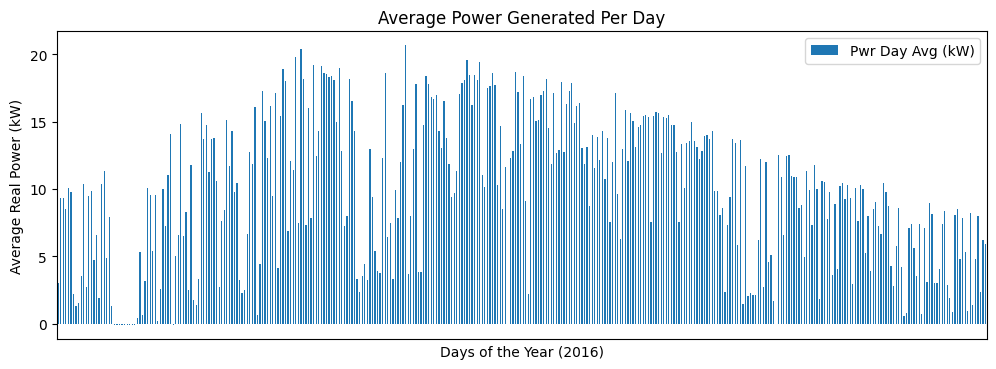

In [183]:
power_day.plot(
    kind='bar', 
    x='Date', 
    y='Pwr Day Avg (kW)', 
    title='Average Power Generated Per Day',
    xlabel='Days of the Year (2016)', 
    ylabel='Average Real Power (kW)', 
    xticks=[],
    figsize=(12, 4)
);


In [184]:
power_day.loc[power_day['Pwr Day Avg (kW)'] <= 0]

,Date,Pwr Day Avg (kW)
22,2016-01-23,-0.077262
23,2016-01-24,-0.077123
24,2016-01-25,-0.076419
25,2016-01-26,-0.091819
26,2016-01-27,-0.131734
27,2016-01-28,-0.132549
28,2016-01-29,-0.135527
29,2016-01-30,-0.134232
30,2016-01-31,-0.122848
45,2016-02-15,-0.110000


In [185]:
solpos = pd.read_csv('data/solpos-2016-39.135554_-77.215578.csv', index_col=0)

In [186]:
solpos['TIMESTAMP'] = pd.to_datetime(solpos[['year', 'month', 'day', 'hour', 'minute']])
solpos['Date'] = solpos['TIMESTAMP'].dt.date
solpos['Time'] = solpos['TIMESTAMP'].dt.time

In [187]:
solpos_day = solpos.groupby('Date').sum('etr').div(1440).reset_index()


In [188]:
solpos_day

,Date,year,month,day,hour,minute,etr
0,2016-01-01,2016.0,1.0,1.0,11.5,29.5,166.875793
1,2016-01-02,2016.0,1.0,2.0,11.5,29.5,167.529114
2,2016-01-03,2016.0,1.0,3.0,11.5,29.5,168.240678
3,2016-01-04,2016.0,1.0,4.0,11.5,29.5,169.009876
4,2016-01-05,2016.0,1.0,5.0,11.5,29.5,169.836560
...,...,...,...,...,...,...,...
361,2016-12-27,2016.0,12.0,27.0,11.5,29.5,164.757274
362,2016-12-28,2016.0,12.0,28.0,11.5,29.5,165.161961
363,2016-12-29,2016.0,12.0,29.0,11.5,29.5,165.625557
364,2016-12-30,2016.0,12.0,30.0,11.5,29.5,166.147623


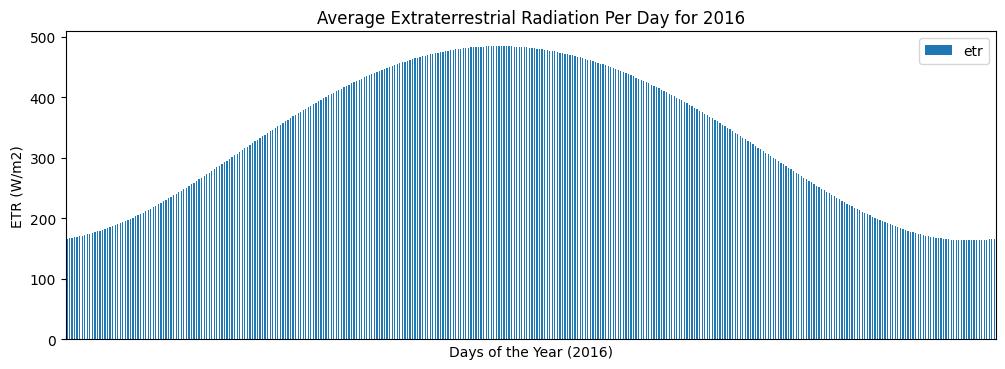

In [189]:
solpos_day.plot(
    kind='bar', 
    x='Date', 
    y='etr', 
    title='Average Extraterrestrial Radiation Per Day for 2016',
    xlabel='Days of the Year (2016)', 
    ylabel='ETR (W/m2)', 
    xticks=[],
    figsize=(12, 4)
);


In [190]:
weather = pd.read_csv('data/weather-2016/IAD-weather-2016-cleaned')

In [191]:
weather['Year'] = 2016
weather

,Month,Day,Temperature Max (C),Temperature Avg (C),Temperature Min (C),Dew Point Max (C),Dew Point Avg (C),Dew Point Min (C),Humidity Max (%),Humidity Avg (%),Humidity Min (%),Wind Speed Max (km/h),Wind Speed Avg (km/h),Wind Speed Min (km/h),Pressure Max (hPa),Pressure Avg (hPa),Pressure Min (hPa),Precipitation (mm),Year
0,1,1,6,3.8,-1,-1,-3.0,-6,72,61.7,49,26,13.5,6,1009.9,1008.6,1006.9,0.00,2016
1,1,2,9,2.5,-3,-3,-5.1,-7,82,60.5,33,22,7.3,0,1010.2,1007.2,1004.5,0.00,2016
2,1,3,12,2.8,-4,-3,-5.0,-7,91,62.0,26,31,8.0,0,1004.2,1001.9,998.8,0.00,2016
3,1,4,2,-0.4,-6,-5,-11.5,-17,66,45.5,31,37,24.6,7,1019.3,1009.4,1002.9,0.00,2016
4,1,5,-1,-6.4,-10,-13,-16.0,-18,77,49.4,29,33,12.2,0,1027.0,1024.7,1019.9,0.00,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,12,27,19,13.4,7,12,6.4,-1,87,64.7,33,33,17.1,6,1007.2,1002.9,1000.2,0.00,2016
362,12,28,9,4.7,-1,0,-3.6,-5,76,52.1,0,24,10.5,0,1011.5,1008.5,1004.9,0.00,2016
363,12,29,11,4.5,1,4,-0.5,-5,93,73.0,41,35,13.4,6,1004.9,997.0,992.1,5.08,2016
364,12,30,5,2.0,-3,-2,-6.1,-9,73,56.0,45,44,20.3,0,1008.5,1000.8,995.8,0.00,2016


In [192]:
weather['TIMESTAMP'] = pd.to_datetime(weather[['Year', 'Month', 'Day']])


Sunrise and sunset calculations adapted from: https://gist.github.com/scivision/228cad3ee5efe74dd5230ddb19bf36fe

In [248]:
latitude = '39.135554'
longitude = '-77.215578'
import ephem
from datetime import timedelta

loc=ephem.Observer()
loc.lat=latitude
loc.lon=longitude
def my_func(time):
    loc.date = time + timedelta(hours=5)
    

    sun = ephem.Sun()

    return (loc.next_setting(sun) - loc.next_rising(sun)) * 24

weather['Daylight (Hours)'] = weather['TIMESTAMP'].apply(my_func)

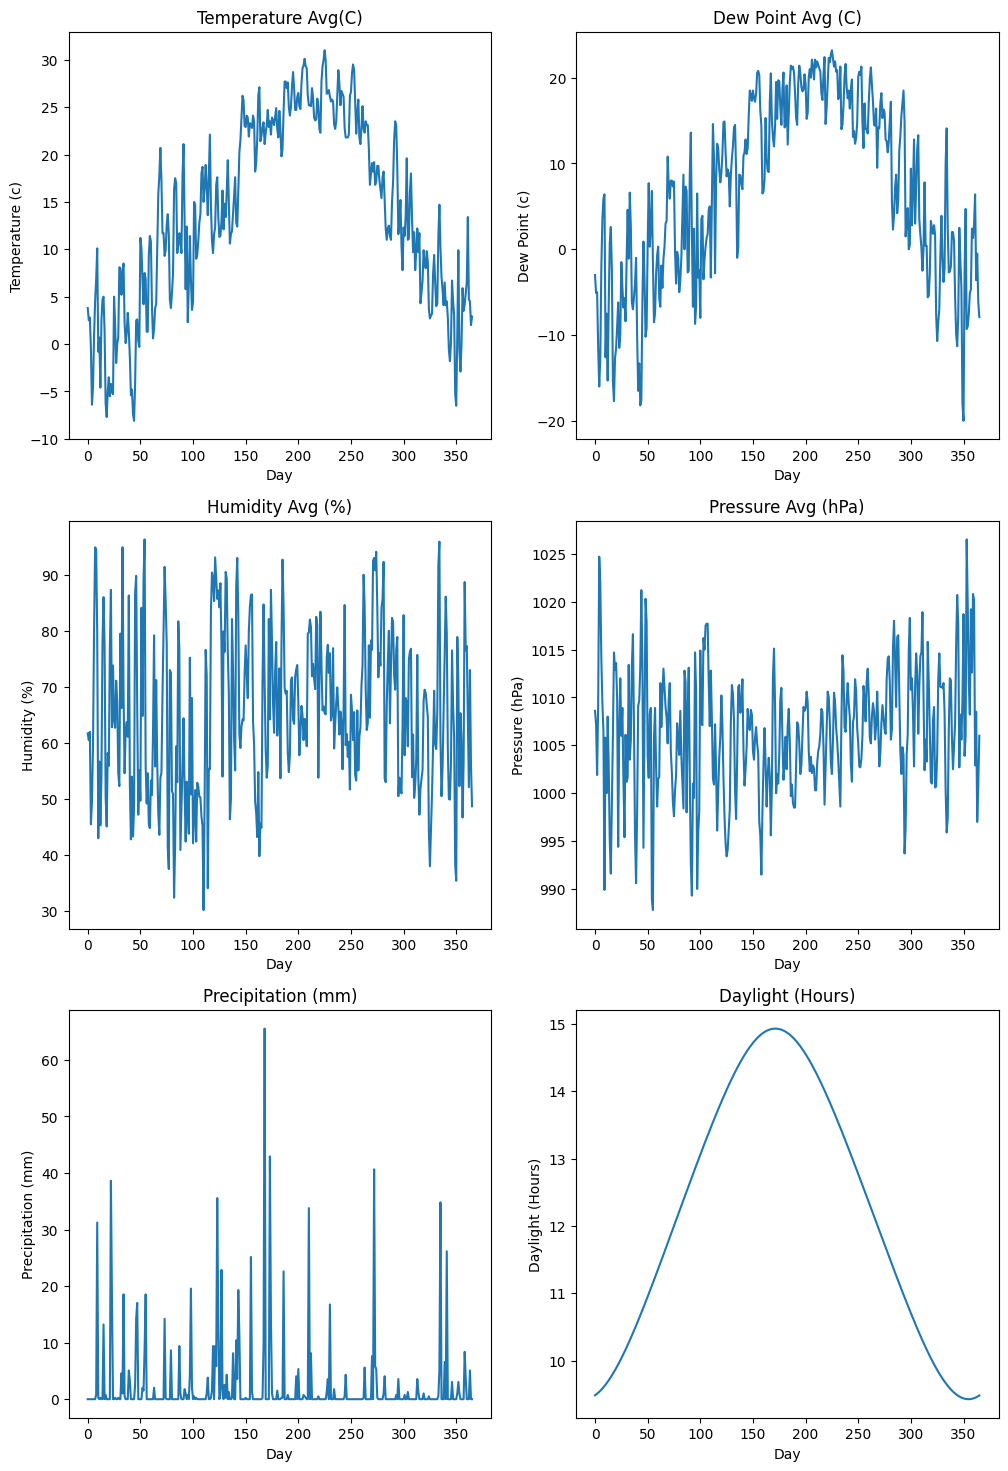

In [251]:
fig, axes = subplots(3, 2, figsize = (12, 18))
weather['Temperature Avg (C)'].plot(kind='line', title='Temperature Avg(C)', xlabel='Day', ylabel= 'Temperature (c)', ax=axes[0,0]);
weather['Dew Point Avg (C)'].plot(kind='line', title='Dew Point Avg (C)', xlabel='Day', ylabel= 'Dew Point (c)', ax=axes[0,1]);
weather['Humidity Avg (%)'].plot(kind='line', title='Humidity Avg (%)', xlabel='Day', ylabel= 'Humidity (%)', ax=axes[1,0]);
weather['Pressure Avg (hPa)'].plot(kind='line', title='Pressure Avg (hPa)', xlabel='Day', ylabel= 'Pressure (hPa)', ax=axes[1,1]);
weather['Precipitation (mm)'].plot(kind='line', title='Precipitation (mm)', xlabel='Day', ylabel= 'Precipitation (mm)', ax=axes[2,0]);
weather['Daylight (Hours)'].plot(kind='line', title='Daylight (Hours)', xlabel='Day', ylabel= 'Daylight (Hours)', ax=axes[2,1]);


In [257]:
df = pd.merge(power_day, weather, left_index=True, right_index=True)
df = pd.merge(df, solpos_day, left_index=True, right_index=True)

In [259]:
df.corr(numeric_only=True)

,Pwr Day Avg (kW),Month,Day,Temperature Max (C),Temperature Avg (C),Temperature Min (C),Dew Point Max (C),Dew Point Avg (C),Dew Point Min (C),Humidity Max (%),...,Pressure Min (hPa),Precipitation (mm),Year,Daylight (Hours),year,month,day,hour,minute,etr
Pwr Day Avg (kW),1.000000,-0.038640,-0.032986,0.550520,0.507877,0.414468,0.344522,0.324361,0.322780,-0.128105,...,0.039968,-0.080262,NaN,0.593912,NaN,-0.038640,-0.032986,NaN,NaN,0.597268
Month,-0.038640,1.000000,-0.008292,0.273254,0.265271,0.267010,0.253978,0.269227,0.275153,0.077302,...,0.258292,-0.075611,NaN,-0.134966,NaN,1.000000,-0.008292,NaN,NaN,-0.143557
Day,-0.032986,-0.008292,1.000000,0.060784,0.049079,0.020655,0.036385,0.038656,0.032444,-0.035727,...,0.019000,0.005908,NaN,0.014744,NaN,-0.008292,1.000000,NaN,NaN,0.014952
Temperature Max (C),0.550520,0.273254,0.060784,1.000000,0.975647,0.904948,0.898950,0.898427,0.873878,0.299702,...,-0.071702,-0.043424,NaN,0.728943,NaN,0.273254,0.060784,NaN,NaN,0.729800
Temperature Avg (C),0.507877,0.265271,0.049079,0.975647,1.000000,0.966702,0.937381,0.944925,0.927905,0.300532,...,-0.087516,-0.012764,NaN,0.768997,NaN,0.265271,0.049079,NaN,NaN,0.769115
Temperature Min (C),0.414468,0.267010,0.020655,0.904948,0.966702,1.000000,0.942018,0.960875,0.953218,0.324868,...,-0.122492,0.042343,NaN,0.762636,NaN,0.267010,0.020655,NaN,NaN,0.761802
Dew Point Max (C),0.344522,0.253978,0.036385,0.898950,0.937381,0.942018,1.000000,0.980277,0.941553,0.524170,...,-0.199446,0.076372,NaN,0.702632,NaN,0.253978,0.036385,NaN,NaN,0.701005
Dew Point Avg (C),0.324361,0.269227,0.038656,0.898427,0.944925,0.960875,0.980277,1.000000,0.981934,0.519885,...,-0.138750,0.072034,NaN,0.712251,NaN,0.269227,0.038656,NaN,NaN,0.710157
Dew Point Min (C),0.322780,0.275153,0.032444,0.873878,0.927905,0.953218,0.941553,0.981934,1.000000,0.483059,...,-0.066439,0.064068,NaN,0.711696,NaN,0.275153,0.032444,NaN,NaN,0.709226
Humidity Max (%),-0.128105,0.077302,-0.035727,0.299702,0.300532,0.324868,0.524170,0.519885,0.483059,1.000000,...,-0.169558,0.241523,NaN,0.215423,NaN,0.077302,-0.035727,NaN,NaN,0.209983
